## from google.colab import drive
#drive.mount('/content/drive')
#!pip install numpy==1.16.1

In [11]:
import sys, os
from emb_classifier_utils import *
from classification_pipeline import ClassificationPipeline
#import analysis_helpers as ah
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Load Embeddings, Metadata, & Original Pitch Tracks and Prepare Labels

embeddings loaded
Num samples: 8484 Dimensions: (128,)
m5_arpeggios_belt_e.f0.csv
17


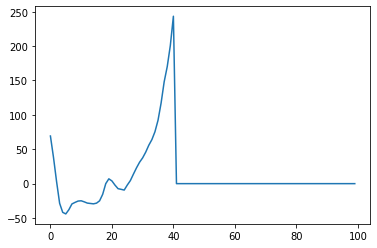

In [12]:
embeddings = 'combo-t-a0-w2v_bs1_VocalSet_testList.txt_embs.npz'

E, F, SF, C= EmbeddingLoader().Load('getEmbeddings/embeddings/{0}'.format(embeddings))
#B = [np.concatenate((E[i],C[i])) for i,x in enumerate(E)]

def test(L):
    print(L[0])
test(F); test(SF); #test(E); #test(C);
plt.plot(C[0])

In [13]:
print(F[0])
Gender, Singer, Movement, VT, Vowel = VocalSetLabels().Create(F)
#Followers, Followees, Country, Song = CreateDAMPLabels(F,'unq_metadata.txt')
#Artist = CreateArtistLabels(F)

#np.savez('./vs_labels', G=Gender, S=Singer,M=Movement,VT=VT, V=Vowel)

m5_arpeggios_belt_e.f0.csv
8484 labels generated


In [14]:
def printDistributions(category):
    print(Counter(category))
def printLabelDists(dataset):
    if(dataset=='VocalSet'):
        printDistributions(Gender)
        printDistributions(Singer)
        printDistributions(Movement)
        printDistributions(VT)
        printDistributions(Vowel)
    elif(dataset=='DAMP'):
        printDistributions(Followers)
        printDistributions(Followees)
        #printDistributions(Country)
        #printDistributions(Song)
    elif(dataset=='Artist'):
        printDistributions(Artist)

printLabelDists('VocalSet')

Counter({'m': 4745, 'f': 3739})
Counter({'5': 1936, '2': 1923, '8': 1816, '3': 1771, '10': 1038})
Counter({'scales': 3776, 'arpeggios': 2294, 'long': 1624, 'caro': 375, 'dona': 233, 'row': 182})
Counter({'slowforte': 1230, 'slowpiano': 1145, 'vibrato': 1110, 'straight': 947, 'vocalfry': 618, 'fastforte': 511, 'fastpiano': 376, 'breathy': 361, 'belt': 351, 'liptrill': 347, 'trill': 337, 'pp': 325, 'messa': 262, 'trillo': 229, 'forte': 169, 'inhaled': 110, 'spoken': 56})
Counter({'i': 1614, 'a': 1608, 'e': 1602, 'u': 1479, 'o': 1391, 'N/A': 790})


### Classifier Construction

In [15]:
class LogisticRegressionClass(ClassificationPipeline):
    def __init__(self):
        super().__init__()
        self.model = LogisticRegression(class_weight = 'balanced', max_iter=5000)
        self.cmap = 'Blues'
lgrp = LogisticRegressionClass()
        
class MLPClass(ClassificationPipeline):
    def __init__(self, h1 = 32, h2 = 16, h3 = 16):
        super().__init__()
        self.model = MLPClassifier(hidden_layer_sizes=(h1, h2, h3), max_iter=1000)   
        self.cmap = 'YlOrBr'
mlp = MLPClass()

#classify call with output:
#score, f1, cm, classes_str = ModelClass.classify(X,y,category,plot=0)

### Do Classification

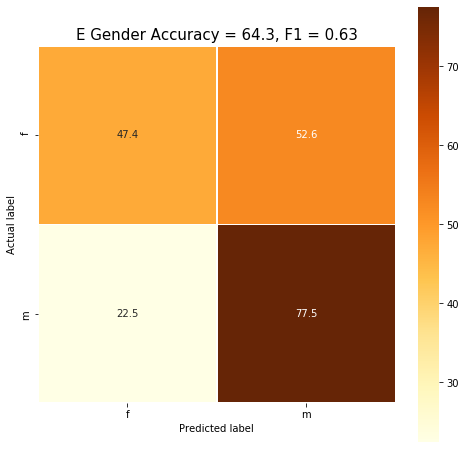

In [16]:
# Gender
score, f1, cm, classes_str = MLPClass(64,32,8).classify(E,Gender,'E Gender')
#MLPClass(64,32,8).classify(C,Gender,'C Gender')
#lgrp.classify(E,Gender,'E Gender')
#lgrp.classify(C,Gender,'C Gender')
#MLPClass(64,32,8).classify(B, Gender, 'B Gender')

(0.36586553963153623,
 0.3319319059230731,
 array([[0.00969903, 0.45664712, 0.10069695, 0.32762656, 0.10533034],
        [0.0026419 , 0.50360339, 0.10664577, 0.28946691, 0.09764203],
        [0.0017094 , 0.12444312, 0.39434974, 0.36065125, 0.11884649],
        [0.00253807, 0.15501776, 0.18541574, 0.56234073, 0.0946877 ],
        [0.0030303 , 0.33200298, 0.21162345, 0.26635982, 0.18698345]]),
 array(['10', '2', '3', '5', '8'], dtype='<U2'))

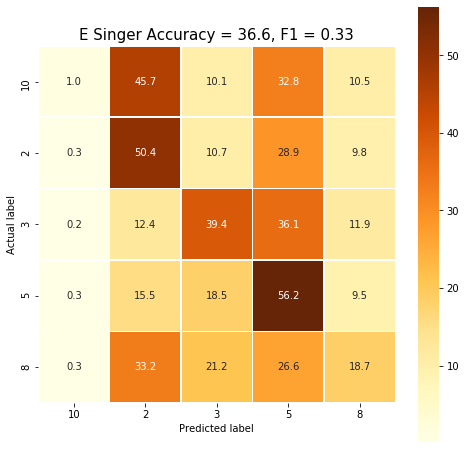

In [17]:
## Singer
MLPClass(64,32,16).classify(E,Singer,'E Singer')
#MLPClass(64,32,16).classify(C,Singer,'C Singer')
#lgrp.classify(E,Singer,'E Singer')
#lgrp.classify(C,Singer,'C Singer')

(0.4662910963854082,
 0.3752455217216864,
 array([[0.11289136, 0.        , 0.        , 0.06757421, 0.        ,
         0.81953443],
        [0.106603  , 0.        , 0.        , 0.05446272, 0.        ,
         0.83893428],
        [0.10048601, 0.        , 0.        , 0.03990665, 0.        ,
         0.85960734],
        [0.06917829, 0.        , 0.        , 0.19606621, 0.        ,
         0.7347555 ],
        [0.13850837, 0.00540541, 0.        , 0.01157982, 0.        ,
         0.84450641],
        [0.0624877 , 0.        , 0.        , 0.04321591, 0.        ,
         0.89429639]]),
 array(['arpeggios', 'caro', 'dona', 'long', 'row', 'scales'], dtype='<U9'))

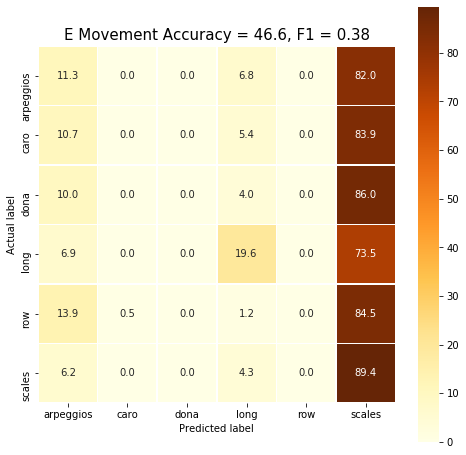

In [18]:
##### Movement
MLPClass().classify(E,Movement,'E Movement')
#MLPClass().classify(C,Movement,'C Movement')
#lgrp.classify(E,Movement,'E Movement')
#lgrp.classify(C,Movement,'C Movement')

(0.2626121568583849,
 0.23061029910633693,
 array([[0.09171824, 0.04375212, 0.03696165, 0.03118674, 0.00555556,
         0.0056891 , 0.03715592, 0.00289855, 0.00289855, 0.1431794 ,
         0.0720203 , 0.00289855, 0.35621632, 0.01182065, 0.00880133,
         0.07413642, 0.0731106 ],
        [0.04393651, 0.1467037 , 0.04359083, 0.01955556, 0.00277778,
         0.01238095, 0.03882011, 0.        , 0.00524691, 0.1029224 ,
         0.08987478, 0.00285714, 0.31124691, 0.00524691, 0.0031746 ,
         0.08008289, 0.09158201],
        [0.01803445, 0.02003916, 0.25916917, 0.10562614, 0.00172414,
         0.0043956 , 0.05655148, 0.00190476, 0.01198678, 0.18709959,
         0.08048707, 0.0043956 , 0.05018484, 0.0036289 , 0.0060496 ,
         0.09470727, 0.09401544],
        [0.02351135, 0.02679417, 0.17678414, 0.18517408, 0.00227273,
         0.01430481, 0.04363829, 0.        , 0.00791661, 0.2108891 ,
         0.06306708, 0.        , 0.07156381, 0.0027027 , 0.01727409,
         0.08461603, 0.0694

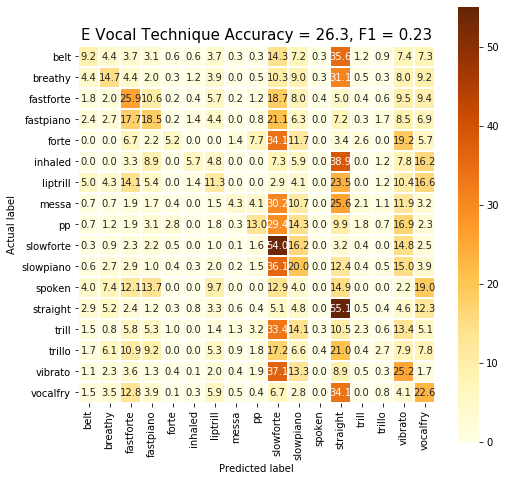

In [19]:
# Vocal Technique

all_vt = [song[0] for song in Counter(VT).most_common()]
top_vt = [all_vt[i] for i in (7,9)]

def isVT(x):
    global top_vt
    if(x in top_vt): return 1
    else: return 0
indices = [i for i, x in enumerate(VT) if isVT(x)]
Esub = [E[i] for i in indices]
Csub = [C[i] for i in indices]
VTsub = [VT[i] for i in indices]

#MLPClass(128,128,64).classify(Esub,VTsub,'E Vocal Technique')
#MLPClass(128,128,64).classify(Csub,VTsub,'C Vocal Technique')
#lgrp.classify(Esub,VTsub,'E Vocal Technique')
#lgrp.classify(Csub,VTsub,'C Vocal Technique')


MLPClass(128,128,64).classify(E,VT,'E Vocal Technique')
#MLPClass(128,128,64).classify(C,VT,'C Vocal Technique')
#lgrp.classify(E,VT,'E Vocal Technique')
#lgrp.classify(C,VT,'C Vocal Technique')

(0.21617080919714038,
 0.186837166289,
 array([[0.07163259, 0.28080622, 0.2151468 , 0.29718889, 0.02694382,
         0.10828169],
        [0.02651285, 0.30113098, 0.24514189, 0.31051784, 0.02078728,
         0.09590916],
        [0.03606083, 0.25370617, 0.28768448, 0.3062555 , 0.0329984 ,
         0.08329463],
        [0.0316797 , 0.23794837, 0.2282598 , 0.3957544 , 0.01921308,
         0.08714465],
        [0.02962921, 0.25774177, 0.28663117, 0.31790807, 0.02341262,
         0.08467715],
        [0.03101109, 0.26161144, 0.23930665, 0.32091435, 0.02712318,
         0.12003328]]),
 array(['N/A', 'a', 'e', 'i', 'o', 'u'], dtype='<U3'))

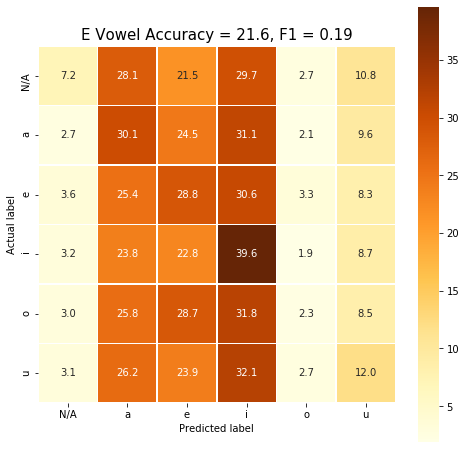

In [20]:
# Vowel
MLPClass().classify(E,Vowel,'E Vowel')
#MLPClass().classify(C,Vowel,'C Vowel')
#lgrp.classify(E,Vowel,'E Vowel')
#lgrp.classify(C,Vowel,'C Vowel')